**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
   
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Good luck on the next sprint!

# Analyzing ride-sharing patterns:  from passenger preferences to understanding how external factors influence journeys.

In this project, the analysts are working on behalf of Zuber, a new entrant in the ride-sharing sector in Chicago. Their objective encompasses understanding passenger preferences and evaluating the impact of external factors on travel.

They will conduct an in-depth examination of a database, analyze competitor data, and test a hypothesis regarding the influence of weather conditions on travel frequency.

Import libaries 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

## Exploratory data analysis

In the previous stages of the project, the analysts interfaced with the database on Platform, extracting the following CSV file:

    project_sql_result_07.csv

In addition to the data obtained from Platform, they were provided with two supplementary files:

    project_sql_result_01.csv
    project_sql_result_04.csv

Moreover, accompanying information about the fields in these files was furnished:

For project_sql_result_01 and project_sql_result_04:

    company_name: representing the taxi company's name.
    trips_amount: denoting the count of rides for each taxi company occurring on November 15-16, 2017.

For project_sql_result_07:

    start_ts: indicating the pickup date and time.
    weather_condition: detailing the weather conditions at the commencement of the ride.
    duration_seconds: specifying the duration of the ride in seconds.

The next step involves importing these files and conducting a comprehensive examination of their contents.

In [2]:
# Load each csv to its own variable
result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

# Create a tuple from the dataframes
data = (result_01, result_04, result_07)

# Assign names to the dataframes
result_01.name = 'project_sql_result_01'
result_04.name = 'project_sql_result_04'
result_07.name = 'project_sql_result_07'

# Print a summary of the dataFrames
for df in data:
    print(f'Name: {df.name}')
    print()
    df.info()
    print()
    print("*"*60)
    print()

Name: project_sql_result_01

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

************************************************************

Name: project_sql_result_04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

************************************************************

Name: project_sql_result_07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):

Based on the printed information, it is observed that there are no null values present in the dataframes. The first dataframe comprises 64 entries across two columns, while the second dataframe encompasses 94 entries within two columns. Additionally, the third dataframe comprises 1068 entries distributed over three columns. The data occupies only a minimal amount of memory space.

Across the columns, the following data types are identified:

    1 column of type 'int64': trips_amount;
    2 columns of type 'float64': average_trips, duration_seconds;
    4 columns of type 'object': company_name, dropoff_location_name, start_ts, weather_conditions.
    
Further analysis reveals that the pickup dates and times are stored as strings in the start_ts column. Consequently, it is imperative to convert the data type of this column to datetime objects. Prior to performing this conversion, an examination of the contents of each column is recommended.

In [3]:
# Display first and last five rows of the dataFrames. 
for df in data:
    print(f'Name: {df.name}')
    print()
    print('First 5 rows:')
    display(df.head())
    print('Last 5 rows')
    display(df.tail())
    print()
    print("*"*60)
    print()

Name: project_sql_result_01

First 5 rows:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Last 5 rows


,company_name,trips_amount
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2



************************************************************

Name: project_sql_result_04

First 5 rows:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Last 5 rows


,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538
93,Riverdale,1.800000



************************************************************

Name: project_sql_result_07

First 5 rows:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Last 5 rows


,start_ts,weather_conditions,duration_seconds
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0
1067,2017-11-04 16:00:00,Bad,2834.0



************************************************************



Observing that the pickup dates and times are stored in the format %Y-%m-%d %H:%M:%S, the next step involves examining the summary statistics within the columns and the value counts of string objects.

In [4]:
# Check summary statistics in the columns of the dataframes
for df in data:
    print(f'Name: {df.name}')
    print()
    for col in df:
        display(df[col].describe().to_frame())
        if type(col) == 'object':
            display(df[col].value_counts().to_frame())

        print()
    print("*"*60)
    print() 

Name: project_sql_result_01



,company_name
count,64
unique,64
top,Norshore Cab
freq,1


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000



************************************************************

Name: project_sql_result_04



,dropoff_location_name
count,94
unique,94
top,Beverly
freq,1


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667



************************************************************

Name: project_sql_result_07



,start_ts
count,1068
unique,81
top,2017-11-11 10:00:00
freq,48


,weather_conditions
count,1068
unique,2
top,Good
freq,888


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000



************************************************************




The provided information comprises summaries of three datasets: project_sql_result_01, project_sql_result_04, and project_sql_result_07.

    For project_sql_result_01:

company_name: Contains 64 unique entries, with each entry having a frequency of 1, implying no repetition. The trips_amount column exhibits a range of values from 2 to 19558, with a mean of approximately 2145.48 trips. The majority of the values are concentrated between 20.75 and 2106.50 trips, with 25% of the data falling below 20.75 and 75% below 2106.50.

    For project_sql_result_04:

dropoff_location_name: Shows 94 unique entries, each appearing only once. The average_trips column displays a range of values from 1.8 to 10727.47, with an average of approximately 599.95 trips. The distribution suggests that 25% of the values lie below 14.27, and 75% below 298.86.

    For project_sql_result_07:

start_ts: Includes 1068 entries, spread across 81 unique timestamps. The most frequent timestamp is '2017-11-11 10:00:00', occurring 48 times. Regarding weather_conditions, there are only two unique values ('Good' and presumably 'Bad'), with 'Good' being the most common, appearing 888 times. The duration_seconds column ranges from 0 to 7440 seconds, with a mean of approximately 2071.73 seconds.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

The analysts will proceed by converting the data type of the start_ts column. Additionally, they will create two new columns: one to exclusively store the ride date and another for the pickup time.

In [5]:
# Change 'start_ts' column to datetime
result_07['start_ts'] = pd.to_datetime(result_07['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
result_07['start_date'] = result_07['start_ts'].dt.date
result_07['start_time'] = result_07['start_ts'].dt.time

# Display dataframe's information and first few rows
result_07.info()
print()
result_07.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   object        
 4   start_time          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 41.8+ KB



,start_ts,weather_conditions,duration_seconds,start_date,start_time
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00


The dataframe should exclusively contain dates corresponding to Sundays in November, as this was the specific criteria used for retrieval. Nonetheless, it is prudent to verify this.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right!

</div>

In [6]:
# Display the counts of the values in the 'start_date' column
display(result_07['start_date'].value_counts().to_frame())

,start_date
2017-11-11,426
2017-11-04,367
2017-11-18,180
2017-11-25,95


Since the month and year attributes of the dates remain constant, next will proceed by creating a new column to store the day of the month for convenience.

In [7]:
# Add a new date column to the dataframe
result_07['start_date'] = result_07['start_ts'].dt.day

result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   int64         
 4   start_time          1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 41.8+ KB


The DataFrame provided appears to contain information about a series of events, possibly pertaining to activities or trips, comprising 1068 entries across five columns. Each event is characterized by its start timestamp (start_ts), representing the moment when the event began, stored as datetime objects. The weather_conditions column details the prevailing weather conditions during each event, stored as strings or objects. Duration of each event is captured in the duration_seconds column, expressed in seconds as float values. The start_date column records the date of commencement for each event, stored as integers, while the start_time column indicates the specific time at which each event started, stored as strings. This DataFrame structure suggests that the data may have been gathered from various sources or logged systematically, with the intent of analyzing event patterns, durations, and their correlation with weather conditions.

In [9]:
# Display the counts of the values in the 'start_time' column
display(result_07['start_time'].value_counts().sort_index().to_frame())

,start_time
00:00:00,2
01:00:00,1
02:00:00,1
03:00:00,4
04:00:00,20
05:00:00,36
06:00:00,96
07:00:00,63
08:00:00,88
09:00:00,42


The value_counts() method in conjunction with sorting and displaying the results in a DataFrame format to provide a count of unique values in the 'start_time' column of the DataFrame result_07. The .value_counts() method counts the occurrences of each unique value in the 'start_time' column. The subsequent .sort_index() method sorts the results by the index (in this case, the time values) in ascending order. Finally, .to_frame() converts the Series object returned by value_counts() into a DataFrame for better display. The resulting DataFrame lists each unique start time along with the count of occurrences of that specific time in the 'start_time' column of the DataFrame result_07. For example, there are 96 events that started at 06:00:00, 100 events at 10:00:00, and only 1 event at 22:00:00, among others. This information provides insights into the distribution of events over different times of the day.

In [10]:
# Add a new hour column to the dataframe
result_07['start_time'] = result_07['start_ts'].dt.hour

# Display dataframe information with new column
print(f'Name: {result_07.name}')
print()
result_07.info()

Name: project_sql_result_07

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   int64         
 4   start_time          1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.8+ KB


This code adds a new column named 'start_time' to the DataFrame result_07. The new column contains the hour component extracted from the 'start_ts' column using the .dt.hour accessor, which returns the hour component of the timestamp as an integer. This effectively assigns each event in the DataFrame result_07 to the hour of the day it started.

After adding the new column, the code prints the name of the DataFrame, which is 'project_sql_result_07'. Then, it displays the information about the DataFrame using the .info() method. This method provides a concise summary of the DataFrame's structure, including the range index, column names, count of non-null values, data types, and memory usage.the DataFrame contains 1068 entries and 5 columns. The 'start_ts' column contains datetime objects, 'weather_conditions' column contains objects, 'duration_seconds' column contains floats, 'start_date' column contains integers, and the newly added 'start_time' column contains integers as well. All columns have non-null values, indicating that there are no missing values in the DataFrame. The memory usage of the DataFrame is also provided, which is approximately 41.8 KB. 

In [11]:
# Identify the top 10 neighborhoods for drop-offs.
top_10_neigh = (result_04.sort_values(by= 'average_trips', ascending=False)).head(10)
sum_others = result_04.loc[~result_04['dropoff_location_name'].isin(top_10_neigh['dropoff_location_name']), 
                           'average_trips'].sum()


# Aggregate data for the remaining neighborhods under 'Others' as dropoff_location_name
top_10_neigh = top_10_neigh.append({'dropoff_location_name': 'Other 84', 'average_trips':sum_others}, ignore_index=True)

# Round and convert to integer the count 
top_10_neigh['average_trips'] = top_10_neigh['average_trips'].round(0).astype('int')

# Display the top 10 neighborhoods for drop-offs.
display(top_10_neigh)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


This code snippet identifies the top 10 neighborhoods for drop-offs based on average trip counts from a dataset represented by result_04. Initially, it sorts the DataFrame result_04 by the 'average_trips' column in descending order and selects the top 10 neighborhoods, storing them in a DataFrame named top_10_neigh. Additionally, it computes the total number of trips for neighborhoods not included in the top 10, labeling this aggregate count under 'Other 84'. After rounding the average trip counts to the nearest integer, it appends this aggregate count to the top_10_neigh DataFrame. The resulting DataFrame, top_10_neigh, encapsulates the top 10 neighborhoods alongside the 'Other 84' category, each with their corresponding average trip counts. The displayed results showcase the top neighborhoods, with 'Loop', 'River North', and 'Streeterville' ranking highest in terms of average drop-off trips, while 'Other 84' represents the cumulative count for all other neighborhoods outside the top 10.

## Plot Bar Graph and Pie Chart

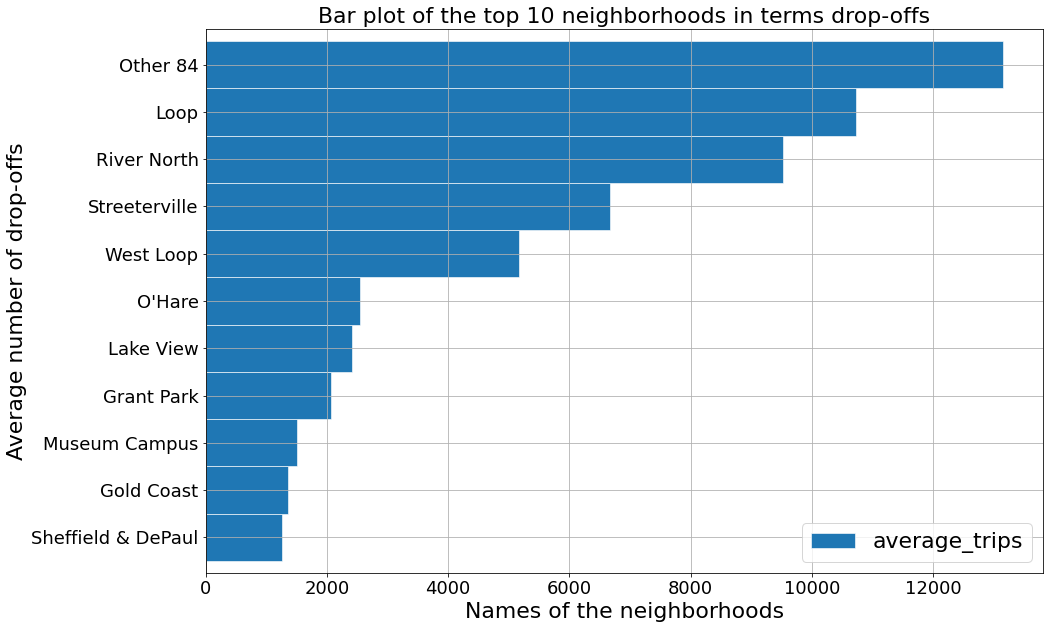

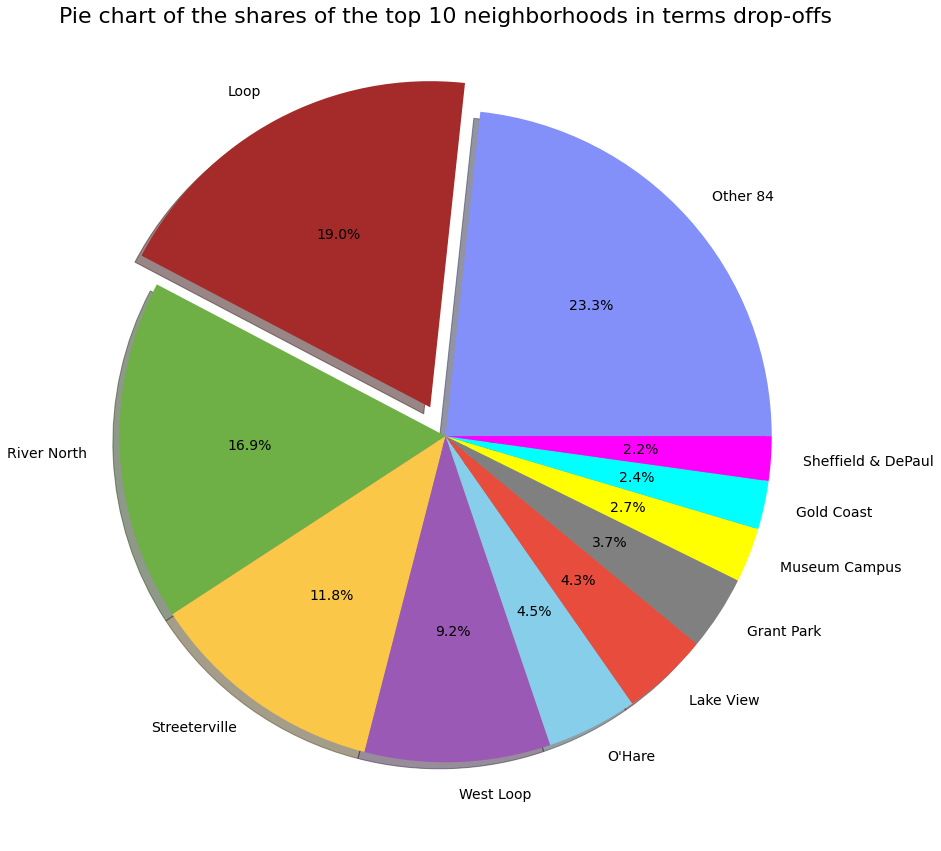

In [12]:
# Plot a bar graph
top_10_neigh = top_10_neigh.sort_values(by= 'average_trips') # Reverse the order for the graph.
ax = top_10_neigh.set_index('dropoff_location_name').plot.barh(grid=True, figsize=(15, 10), width=1,
                                                              edgecolor='white', linewidth=0.6)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the top 10 neighborhoods in terms drop-offs', fontsize=22)
ax.set_xlabel('Names of the neighborhoods', fontsize=22)
ax.set_ylabel('Average number of drop-offs', fontsize=22)
ax.legend(fontsize=22)
plt.show()
print()
# Add the share of rides for each neighborhood in percentage.
top_10_neigh['trips_pct'] = (top_10_neigh['average_trips']/ sum(top_10_neigh['average_trips'])*100).round(1)

# Plot a pie chart
plt.figure(figsize=(15,15))
top_10_neigh = top_10_neigh.sort_values(by= 'average_trips', ascending=False) # Reverse the order for the graph.

top_10_neigh_list = ['Other 84', 'Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

colors =  ['#8390FA', 'brown', '#6EAF46', '#FAC748', "#9b59b6", "skyblue",
           '#e74c3c', 'grey', 'yellow', 'cyan', 'magenta']
plt.pie(top_10_neigh['trips_pct'].head(11), explode=explode, colors = colors,
              labels=top_10_neigh_list, autopct='%1.1f%%', textprops={'fontsize': 14},
        shadow=True, startangle=0)
plt.title('Pie chart of the shares of the top 10 neighborhoods in terms drop-offs', fontsize=22)

plt.show()

The pie chart illustrates that just over a third of the market share is dominated by the two most popular neighborhoods. Furthermore, the top four neighborhoods collectively account for half of the market share, while the remainder, represented as 'Other 84', captures slightly less than a quarter of the market.

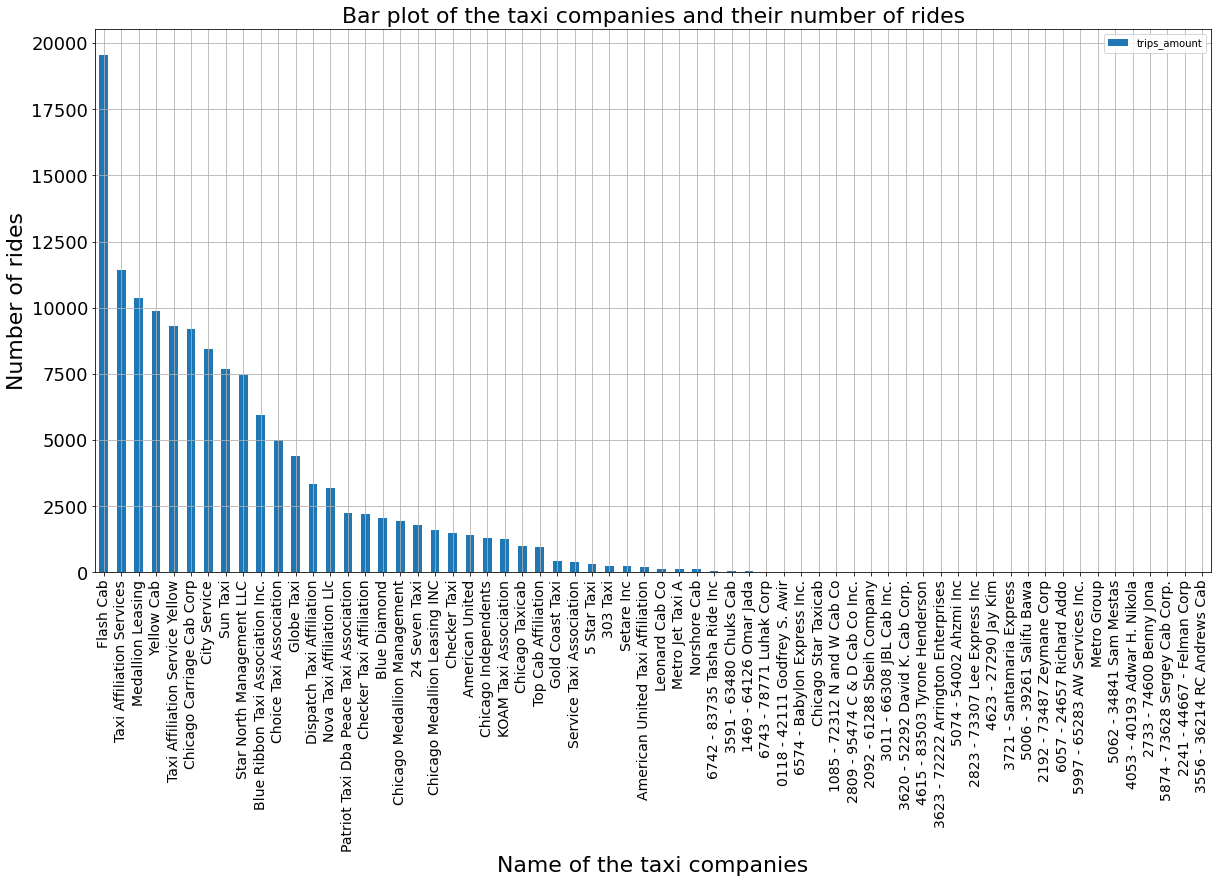

In [13]:
# Plot a bar graph

ax = result_01.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the taxi companies and their number of rides', fontsize=22)
ax.set_xlabel('Name of the taxi companies', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)

plt.show()

It appears that a considerable portion of taxi companies, nearly half of them, have relatively insignificant numbers of recorded rides. To address this, let's revise the graph to focus solely on the 35 busiest taxi companies.

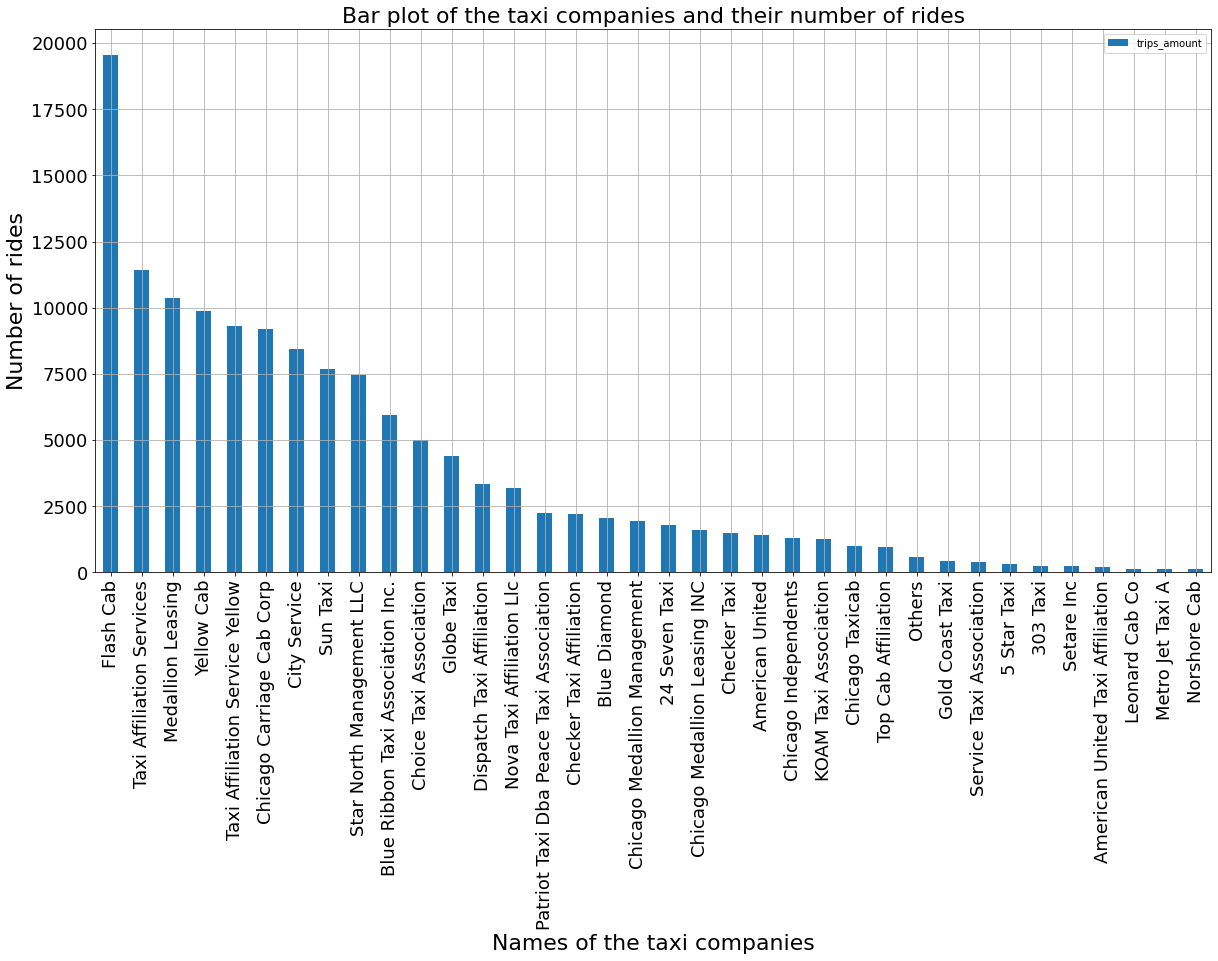

In [14]:
busiest_35 = result_01.sort_values(by='trips_amount', ascending=False).head(35)

sum_others = result_01.loc[~result_01['company_name'].isin(busiest_35['company_name']), 
                           'trips_amount'].sum()


# Aggregate data for the remaining neighborhods under 'Others' as dropoff_location_name
busiest_35 = busiest_35.append({'company_name': 'Others', 'trips_amount':sum_others}, 
                               ignore_index=True).sort_values(by='trips_amount', ascending=False)

ax = busiest_35.set_index('company_name').plot.bar(grid=True, figsize=(20, 10))
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('Bar plot of the taxi companies and their number of rides', fontsize=22)
ax.set_xlabel('Names of the taxi companies', fontsize=22)
ax.set_ylabel('Number of rides', fontsize=22)
plt.show()

In [15]:
# Display head rows from the dataframe
display(busiest_35.head(11))

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Flash Cab emerges as the most active partner, facilitating nearly 20,000 trips. Following closely behind is Taxi Affiliation Services, which secures slightly over half the number of rides compared to Flash Cab. It's noteworthy that the terms "affiliate service" or "taxi association" suggest that certain business partners may operate within affiliate networks.

Certainly, engaging in conversations with our business peers would be beneficial to gain deeper insights into the workings of these networks. However, it's evident now why certain companies hold significant sway in the market – they operate within a network comprising smaller taxi companies. This networked structure likely amplifies their influence and market presence, contributing to their dominance.


Arthur Dickholtz, affectionately known as the 'old cab driver', embodied the spirit of the taxi industry, understanding its dynamics and the importance of serving both passengers and drivers. His vision led to the establishment of FLASH CAB CO., a service owned and led by one of their own – someone intimately familiar with the ins and outs of the cab business. Even after his passing in May of 1988, Dickholtz's aspirations for FLASH and its affiliates endured. As the torch was passed to its current owners, FLASH CAB CO. continued to evolve, embracing cutting-edge technology, bolstering driver support systems, and adapting to the demands of the modern business landscape. Today, FLASH CAB CO. stands as a testament to Dickholtz's legacy, dispatching taxis across Chicago with efficiency and reliability, just as he envisioned – in a flash!

### Summary

In this phase, we successfully imported Zuber ride-sharing data for November 2017 into our workspace and conducted an initial analysis of the datasets. Our observations led us to conclude that converting the date column to a datetime object would enhance data manipulation. Furthermore, we identified several statistical outliers across various aspects, excluding those related to travel duration, which will be addressed in subsequent steps. Through our evaluation, we unearthed insights into the most prominent taxi companies and popular drop-off neighborhoods. Notably, our visualizations vividly illustrated the considerable discrepancies in market shares among taxi companies and drop-off areas. Companies like Flash Cab and neighborhoods such as Loop and River North emerged as dominant entities, overshadowing their counterparts significantly. These findings provide a solid foundation for further exploration and optimization in our ride-sharing data analysis journey.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully. Nice plots!

</div>

## Hypothesis testing

In this phase, we aim to test the following hypothesis:

    Hypothesis: The average duration of rides from the Loop neighborhood to O'Hare International Airport varies on rainy Sundays.

However, the hypothesis statement lacks clarity regarding how to group the data. Two options exist for grouping the data: one based on overall weather conditions and another based on whether it rained for at least an hour on a particular Sunday. In the absence of clarification from a colleague, we will explore both options and discuss the limitations of each approach during testing.

To test both hypotheses, we will employ a t-test, a commonly used method for comparing the means of two populations within a dataset. It's worth noting that the t-test is sensitive to outliers, as it relies on the sample mean and variance. Thus, it's imperative to check for statistical outliers before conducting the test.

## First test

Here are the reformulated null and alternative hypotheses:
    
    Null Hypothesis: The average duration of rides from the Loop neighborhood to O'Hare International Airport during Sunday hours remains consistent irrespective of whether the weather condition is classified as 'Good' or 'Bad'.
    
    Alternative Hypothesis: The average duration of rides from the Loop neighborhood to O'Hare International Airport varies during Sunday hours depending on whether the weather condition is classified as 'Good' or 'Bad'.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The null and alternative hypotheses were formulated correctly

</div>

 Examining the statistical outliers using a scatter plot.

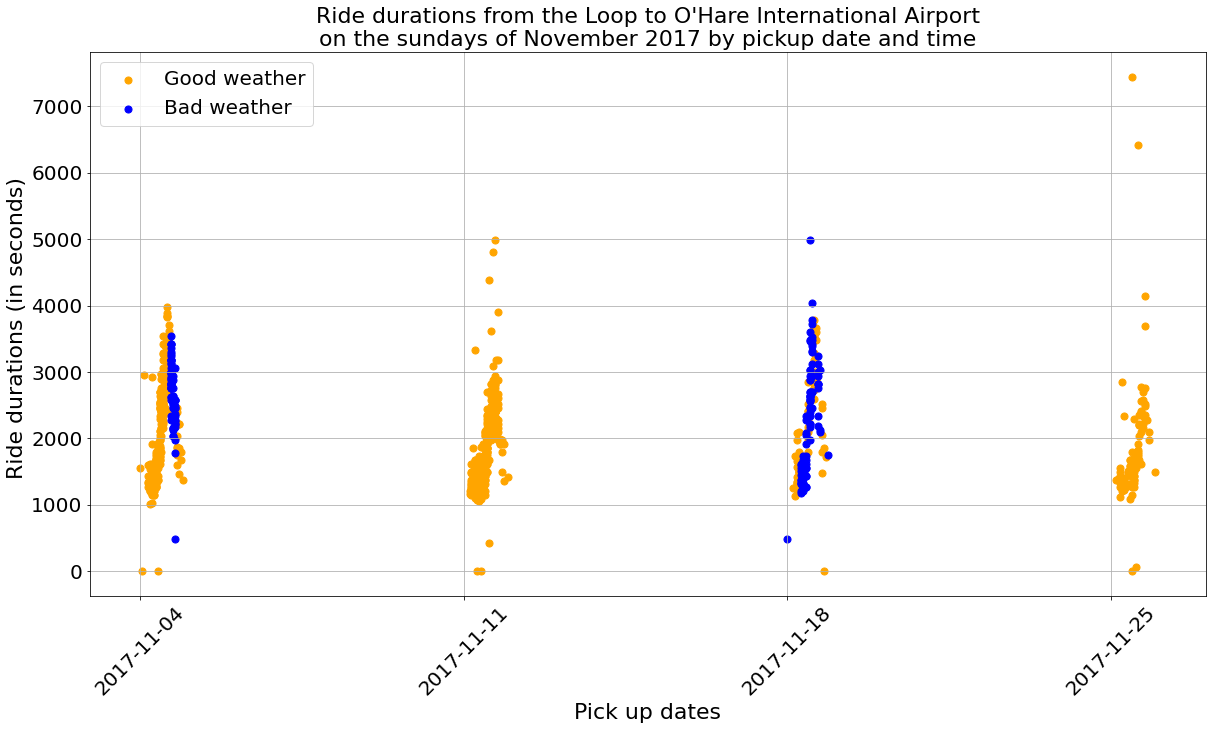

In [16]:
# Generate a scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()


In the graph depicted above, isolated points deviating from the main clusters are noticeable. A summary of observations regarding these isolated points reveals several key points. Firstly, there are relatively few isolated points. Secondly, some rides exhibit durations of approximately 0 seconds, which is implausible and likely indicates canceled rides before pickup. These instances should be excluded from the dataset. Additionally, a small number of rides lasting around 500 seconds raise suspicion, as such durations are optimistic and suggest unusually fast travel with minimal obstacles. These anomalies should also be considered erroneous and removed from the data. Furthermore, a few rides with durations extending up to 1000 seconds beyond the maximum observed within the clusters, particularly on the last Sunday, indicate significantly longer journeys. While extreme conditions like accidents could theoretically cause such delays, the absence of clustered rides starting from the same time frame suggests alternative explanations. One possibility is rides being shared among multiple customers, possibly facilitated by ride-sharing features offered by some taxi apps. Another scenario could involve passengers forgetting essential items in the pickup neighborhood, necessitating a return trip before proceeding to the destination. Given the atypical nature of these rides, they should be excluded from the hypothesis test samples.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good points!

</div>

### Filter outliers

Let's now examine the rides we previously identified as unreasonably short or significantly longer.

In [17]:
# Filter outliers, store them separetely, and display them
outliers_short = result_07.loc[result_07['duration_seconds'] < 1000]
display(outliers_short)

outliers_long = result_07.loc[result_07['duration_seconds'] > 4000]
display(outliers_long)

,start_ts,weather_conditions,duration_seconds,start_date,start_time
15,2017-11-25 13:00:00,Good,60.0,25,13
163,2017-11-11 09:00:00,Good,0.0,11,9
168,2017-11-11 07:00:00,Good,0.0,11,7
203,2017-11-18 00:00:00,Bad,480.0,18,0
204,2017-11-18 19:00:00,Good,0.0,18,19
424,2017-11-11 13:00:00,Good,420.0,11,13
552,2017-11-04 01:00:00,Good,0.0,4,1
801,2017-11-04 09:00:00,Good,0.0,4,9
860,2017-11-04 18:00:00,Bad,480.0,4,18
1063,2017-11-25 11:00:00,Good,0.0,25,11


,start_ts,weather_conditions,duration_seconds,start_date,start_time
79,2017-11-11 15:00:00,Good,4800.0,11,15
110,2017-11-18 13:00:00,Bad,4044.0,18,13
276,2017-11-18 12:00:00,Bad,4980.0,18,12
353,2017-11-25 18:00:00,Good,4140.0,25,18
354,2017-11-25 11:00:00,Good,7440.0,25,11
583,2017-11-11 16:00:00,Good,4980.0,11,16
619,2017-11-25 14:00:00,Good,6420.0,25,14
646,2017-11-11 13:00:00,Good,4380.0,11,13


The provided code segment filters outliers from the dataset based on ride durations and separates them into two categories: outliers with short durations (less than 1000 seconds) and outliers with long durations (greater than 4000 seconds). The DataFrame 'outliers_short' contains rides with durations below the threshold, while 'outliers_long' encompasses rides with durations exceeding the specified limit. Each DataFrame includes columns such as 'start_ts' indicating the pickup date and time, 'weather_conditions' representing the weather conditions during the rides, 'duration_seconds' recording the duration of each ride, 'start_date' denoting the date when the ride commenced, and 'start_time' specifying the time when the ride initiated. The displayed data showcases instances of exceptionally short or long ride durations alongside their corresponding timestamps and weather conditions. This filtering process helps in identifying and analyzing potential anomalies within the dataset, providing insights into irregular ride durations that may warrant further investigation or correction.

### Drop outliers

In [18]:
# Drop outliers from samples
outlier_list = list(outliers_short.index) + list(outliers_long.index)
print(outlier_list)

result_07_typ = result_07.drop(outlier_list)
result_07_typ.info()

[15, 163, 168, 203, 204, 424, 552, 801, 860, 1063, 79, 110, 276, 353, 354, 583, 619, 646]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1050 non-null   datetime64[ns]
 1   weather_conditions  1050 non-null   object        
 2   duration_seconds    1050 non-null   float64       
 3   start_date          1050 non-null   int64         
 4   start_time          1050 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 49.2+ KB


The provided DataFrame contains ride data comprising 1050 entries distributed across five columns. These columns include 'start_ts', representing the pickup date and time stored in datetime format; 'weather_conditions', indicating the weather conditions during the rides; 'duration_seconds', recording the duration of each ride in seconds; 'start_date', denoting the date (day of the month) when the ride commenced; and 'start_time', specifying the time (hour of the day) when the ride initiated. The summary underscores the comprehensive nature of the dataset, encompassing essential details such as timestamps, weather conditions, and ride durations. With this information, analysts can explore various aspects of ride patterns, potentially uncovering insights into factors influencing ride durations or preferences. Further analysis or interpretation of the dataset may shed light on specific research inquiries or business objectives related to ride-sharing operations or passenger behavior.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great!
    

</div>

### Testing the Hypothesis

It is now time to execute the test. Fortunately, the scipy library has already implemented the necessary algorithms for the test, eliminating the need for manual coding. However, two variables need to be determined. Firstly, the critical value alpha should be set to 5%, establishing the significance level for hypothesis testing. Secondly, the "equal_var" argument for the test algorithm needs to be configured. This argument should be set to True if the samples are expected to originate from populations with similar parameters, and False if they are anticipated to originate from populations with different parameters. To determine the value of this argument, empirical variances should be calculated for each sample group. If the difference between the variances is within 5%, the argument should be set to True; otherwise, it should be set to False.

In [19]:
# Get results
results_bad = result_07_typ.loc[result_07_typ['weather_conditions']=='Bad']
results_good = result_07_typ.loc[(result_07_typ['weather_conditions']=='Good')]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()


# Check if sample variances differ more than 5%
eq_var = False
pct_c1 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_1)
pct_c2 = np.abs(np.var(sample_1)-np.var(sample_2)) / np.var(sample_2)

if pct_c1 <= 0.05 or pct_c2 <= 0.05:
    eq_var = True

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
# results = st.ttest_rel(sample_1, sample_2)



print('Sample mean of ride durations in "Bad" weather:', 
      '{} seconds'.format(np.mean(sample_1).round(0).astype('int')))
print('Sample mean of ride durations in "Good" weather:', 
      '{} seconds'.format(np.mean(sample_2).round(0).astype('int')))
print()
print('eq_var argument of t-test set to:', eq_var)
print()
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

Sample mean of ride durations in "Bad" weather: 2426 seconds
Sample mean of ride durations in "Good" weather: 1994 seconds

eq_var argument of t-test set to: False

p-value:  1.083629710157954e-13
We reject the null hypothesis


This code segment conducts a hypothesis test to assess the difference in average ride durations between 'Bad' and 'Good' weather conditions. Initially, ride durations are extracted separately for each weather condition from the dataset. Subsequently, two samples are created, each containing ride durations corresponding to 'Bad' and 'Good' weather conditions. The code then evaluates whether the variances of these samples differ by more than 5% to determine the appropriate setting for the equal_var argument in the t-test. A two-sample independent t-test is then performed to compare the mean ride durations of the two samples. The results, including sample means and the p-value of the t-test, are displayed. A p-value below the predefined significance level indicates a rejection of the null hypothesis, suggesting a significant difference in ride durations between 'Bad' and 'Good' weather conditions. Conversely, a p-value above the significance level fails to reject the null hypothesis, implying no significant difference in ride durations.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The test was conducted correctly

</div>

### Scatter Plot

We conducted an initial hypothesis test by categorizing the data into 'Good' and 'Bad' weather samples. Nevertheless, as we will demonstrate later, this methodology can be deceptive as it overlooks other potential external factors that might influence the outcomes. For instance, the presence of rush hour traffic during adverse weather conditions may contribute to the observed variations, rather than solely attributing them to bad weather conditions. To gain further insights, we will redraw the scatterplot (excluding the removed points) and derive additional observations from the updated visualization.

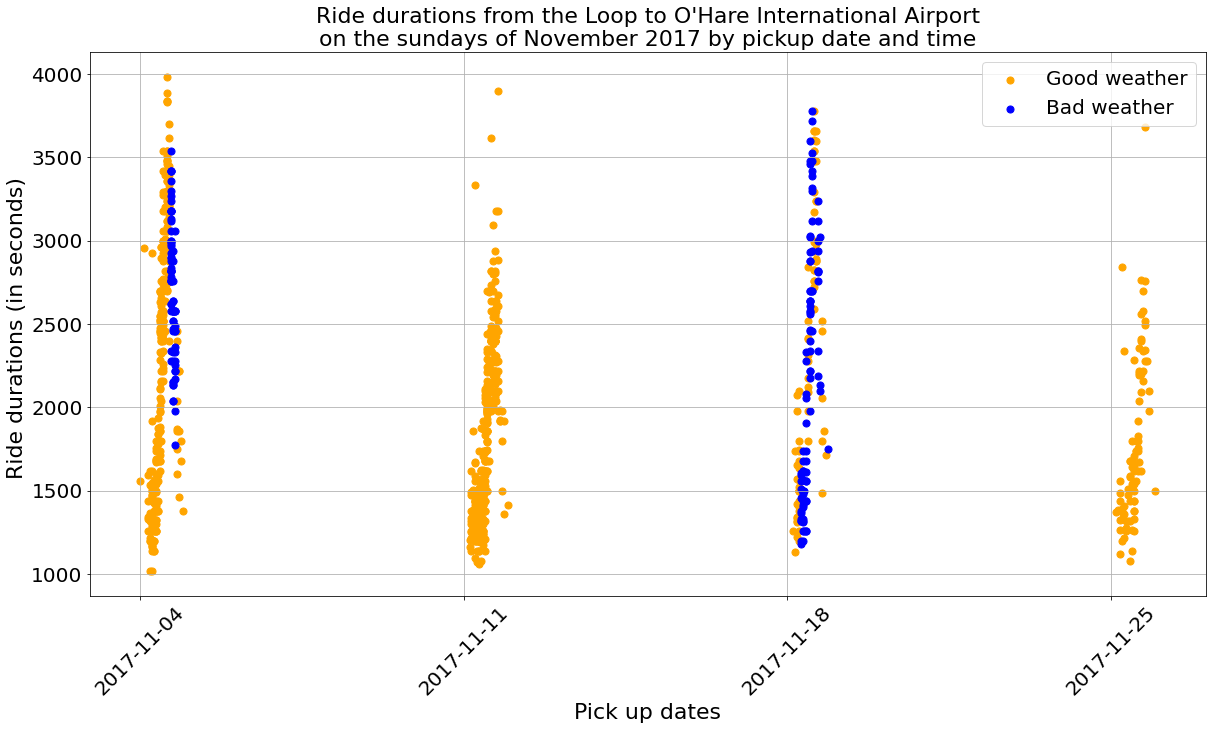

In [20]:
# Generate scatter plot
plt.figure(figsize=(20,10))
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Good','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Good', 'duration_seconds'], 
            s=50, c='Orange', label='Good weather')
plt.scatter(result_07_typ.loc[result_07['weather_conditions'] == 'Bad','start_ts'], 
            result_07_typ.loc[result_07['weather_conditions'] == 'Bad', 'duration_seconds'], 
            s=50, c='Blue', label='Bad weather')
plt.title("Ride durations from the Loop to O'Hare International Airport\n"
          "on the sundays of November 2017 by pickup date and time",
          fontsize=22)
plt.legend(fontsize=20)
plt.ylabel("Ride durations (in seconds) ", fontsize=22)
plt.xlabel('Pick up dates', fontsize=22)
plt.xticks(result_07['start_ts'].dt.date.unique(), fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

For each Sunday in November 2017, distinct elongated clusters of points are evident within the data. Within these clusters, several observations can be made:

    1.The lower limit of these clusters is approximately 1000 seconds, equivalent to 17 minutes.
    2.Ride durations within these clusters can extend up to three times longer than the lower limit.
    3.The first and third Sundays exhibit more rides lasting between 3000 to 4000 seconds (approximately 50 to 67 minutes) compared to the second and fourth Sundays, where the upper limit is around 50 minutes.
    
Interestingly, the elongated clusters corresponding to both 'Good' and 'Bad' weather conditions suggest complex patterns. Despite not all rides being tagged as 'Bad' weather, the first and third clusters notably correspond to rainy Sundays.

In summary, two conclusions can be drawn. Firstly, while variations in ride durations within clusters are observed, weather conditions alone do not seem to be the primary determinant. Instead, external factors such as peak hour traffic likely play a significant role, influencing ride durations. Secondly, variations in the upper limits of ride durations across clusters seem to align with the overall weather situation of each Sunday. Thus, it is hypothesized that average ride durations are longer on rainy Sundays, a hypothesis to be formally tested in the subsequent subsection.

## Second test:

We formulate the null and alternative hypotheses as follows:

    Null Hypothesis: The hourly average durations of rides from Loop neighborhood to O'Hare International Airport on Sundays with bad and good weathers are equal.

    Alternative Hypothesis: The hourly average duration of rides from Loop neighborhood to O'Hare International Airport on bad weather Sundays differs from good ones.
Let us now plot the data for each sunday of the month separately. We will also mark the weather condition on these plots.

### Plot Generation

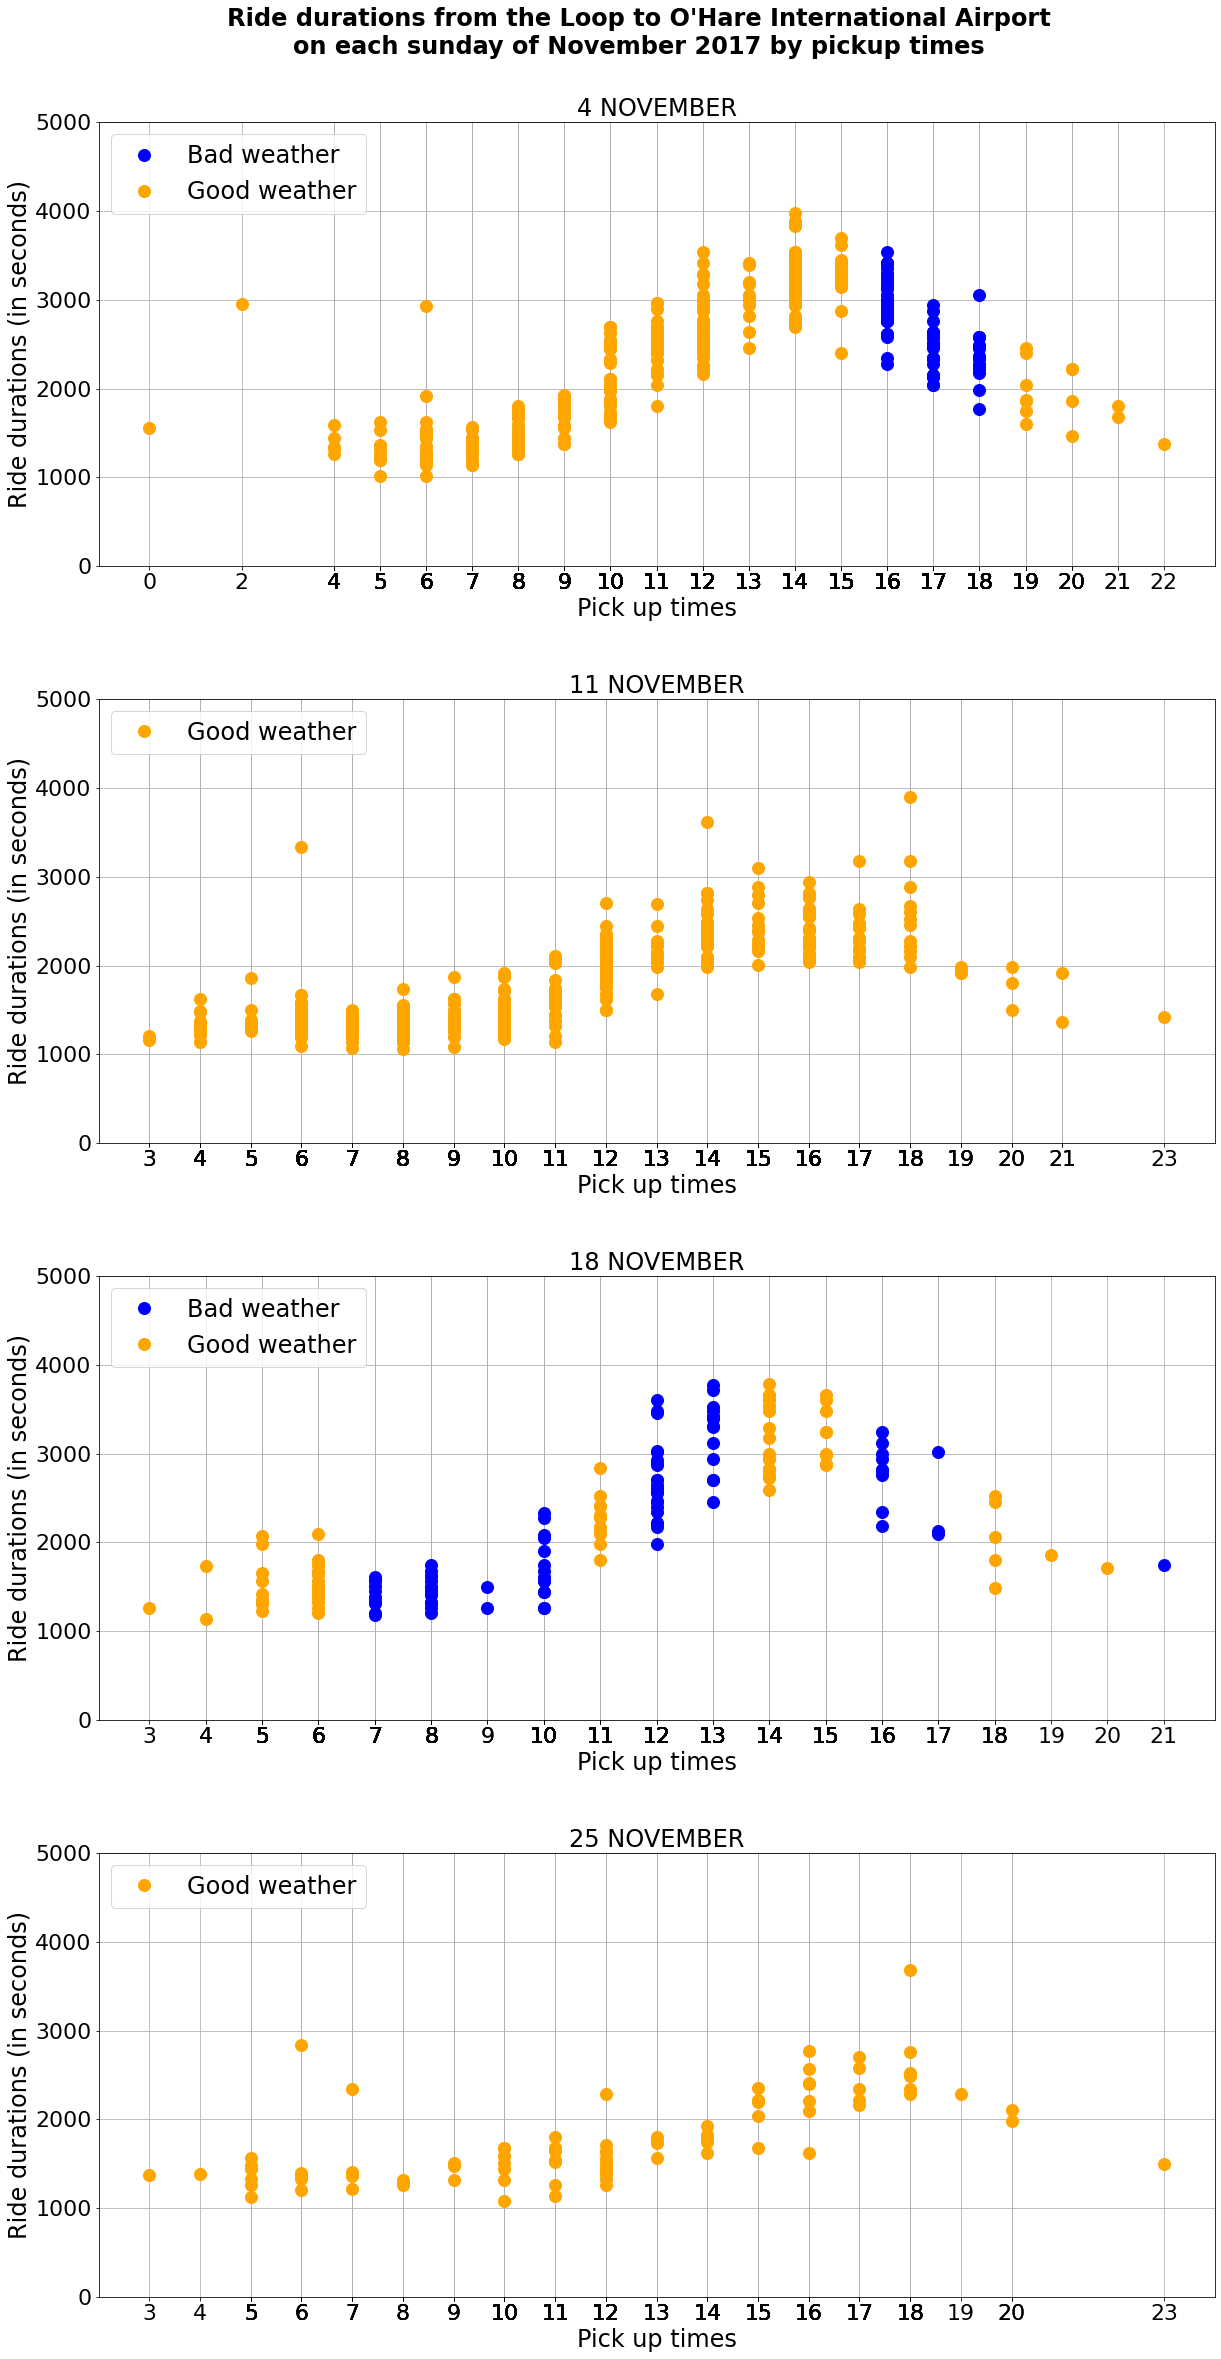

In [21]:
# Generate plot of hourly ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

groups_1 = result_07_typ.groupby(by='start_date')

colors = {'Good':'orange', 'Bad':'blue'}

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
                label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24, loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)
    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()

   Observing the plot, it's evident that afternoon rides typically exhibit longer durations, confirming our initial suspicion regarding potential in-cluster variations caused by peak hours. Furthermore, we notice that ride durations on the last Sunday of the month appear more consistent overall, albeit with a few exceptions. These deviations may stem from either reduced data availability for the last Sunday or genuine variations. Additionally, some statistical outliers persist, such as a ride lasting over 1000 seconds longer than all others on the last Sunday at 6:00 am. This anomaly could result from the ride being shared by multiple clients. To ensure the inclusion of only typical rides, manual removal of these points prior to computing average ride durations for each hour is necessary. While an outlier detection algorithm could have been beneficial, given the limited number of points requiring removal and their identifiable nature, manual removal suffices in this instance.

### Outlier Drop

In [22]:
# Drop outliers from 4 November
# Rides taking more than 2500 seconds at 02:00 and 06:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07['start_date'] == 4) 
                                                      & (result_07_typ['start_time'].isin([2, 6])) &
                                                      (result_07['duration_seconds'] > 2500)].index))


    

# Drop outliers from 11 November
# rides taking more than 3000 seconds at 06:00, 14:00, 17:00, and 18:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 11) 
                                                      & (result_07_typ['start_time'].isin([6, 14, 17, 18])) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

# Drop outliers from 25 November
# rides taking more than 2000 seconds at 06:00, 07:00, and 12:00 
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'].isin([6, 7, 12])) &
                                                      (result_07_typ['duration_seconds'] > 2000)].index))
# Rides taking more than 3000 seconds at 18:00
result_07_typ = result_07_typ.drop(list(result_07_typ.loc[(result_07_typ['start_date'] == 25) 
                                                      & (result_07_typ['start_time'] == 18) &
                                                      (result_07_typ['duration_seconds'] > 3000)].index))

result_07_typ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1067
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1039 non-null   datetime64[ns]
 1   weather_conditions  1039 non-null   object        
 2   duration_seconds    1039 non-null   float64       
 3   start_date          1039 non-null   int64         
 4   start_time          1039 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 48.7+ KB


The provided code snippet entails data cleaning steps aimed at removing outliers from the dataset pertaining to ride durations on specific dates and times. For instance, on November 4th, rides exceeding 2500 seconds at 02:00 and 06:00 are eliminated. Similarly, for November 11th, rides surpassing 3000 seconds at 06:00, 14:00, 17:00, and 18:00 are removed. Additionally, on November 25th, rides taking more than 2000 seconds at 06:00, 07:00, and 12:00, as well as those exceeding 3000 seconds at 18:00, are filtered out. After executing these outlier removal operations, the resulting dataset contains 1039 entries across five columns: start_ts (datetime), weather_conditions (object), duration_seconds (float), start_date (int), and start_time (int). This process ensures that the dataset is more robust and reliable for subsequent analysis.

Subsequently, hourly average ride durations are calculated individually for each Sunday. This approach allows for estimating the hourly average ride durations with consistent external conditions.

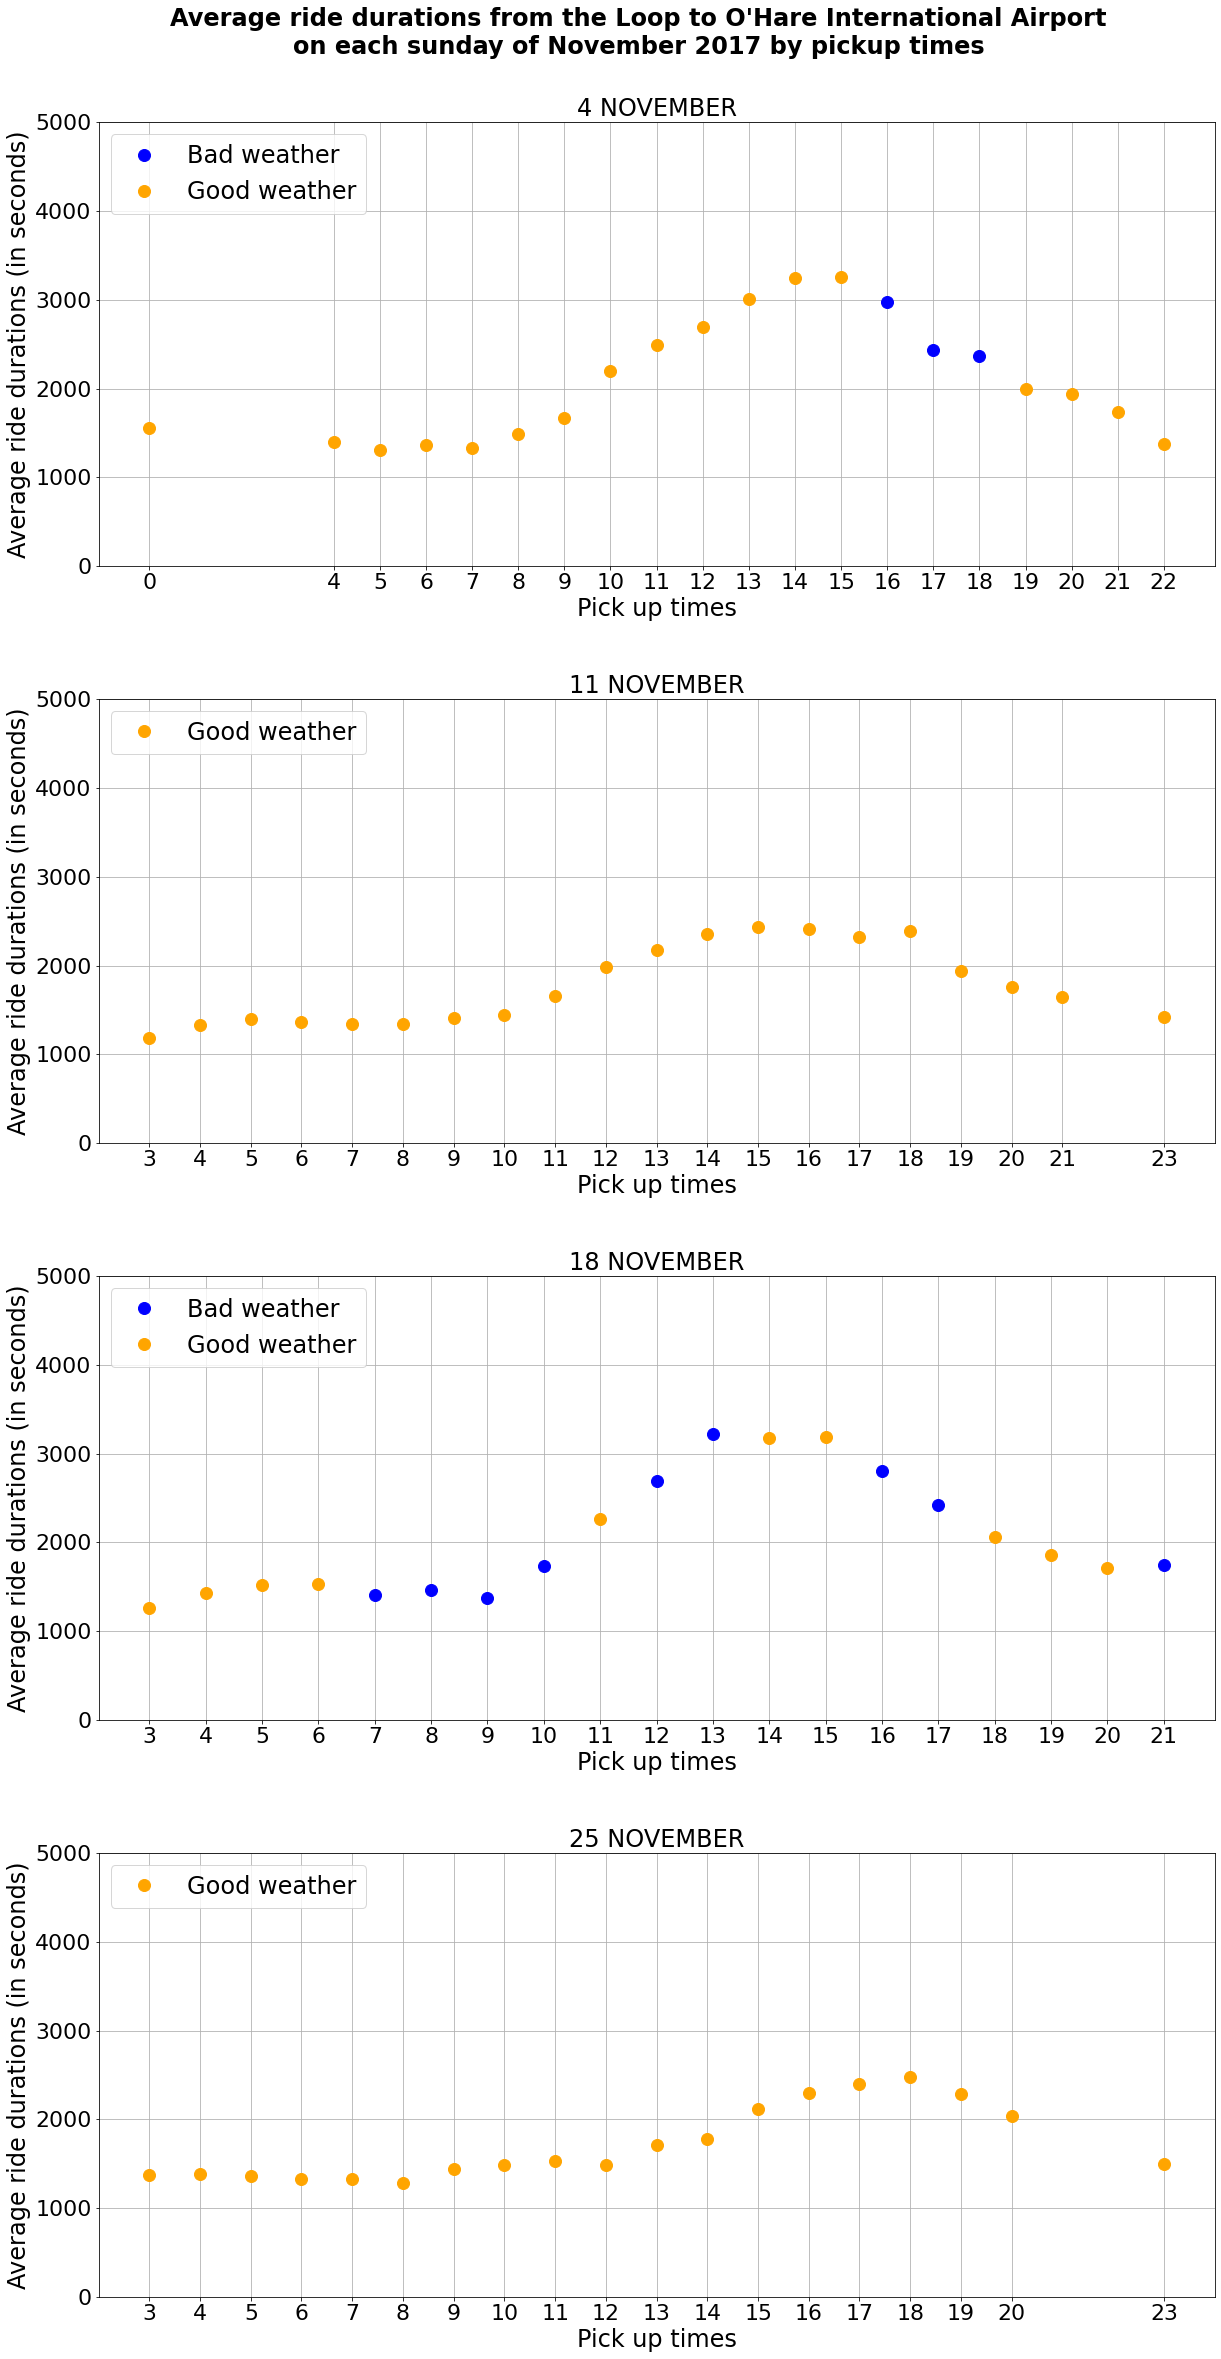

In [23]:
# Generate plot of hourly average ride durations for each Sunday
fig, ax = plt.subplots(4, 1, figsize=(20, 40))

result_07_typ_averaged = result_07_typ.groupby(by=['start_date', 'start_time']).agg(
    {'duration_seconds':'mean', 'weather_conditions':'max'}).reset_index()

colors = {'Good':'orange', 'Bad':'blue'}


# Set the value of the maximum number of rows that can be displayed to 100.
pd.set_option('display.max_rows', 100)

groups_1 = result_07_typ_averaged.groupby(by='start_date')

i = 0
for name, group in groups_1:
    groups_2 = group.groupby(by='weather_conditions')
    for name_2, group_2 in groups_2:

        ax[i].plot(group_2['start_time'], group_2['duration_seconds'],
               marker='o', linestyle='', ms=12, 
               label='{} weather'.format(name_2), c = colors[group_2['weather_conditions'].max()]
               )
        ax[i].legend(fontsize=24,  loc= 'upper left')
    ax[i].set_title('{} NOVEMBER'.format(str.upper(str(name))), fontsize=24, fontweight='light')
    ax[i].grid()
    ax[i].set_xlabel('Pick up times', fontsize=24)
    ax[i].set_ylabel('Average ride durations (in seconds)', fontsize=24)
#    ax[i].set_yticks(fontsize=20, rotation=45)
    ax[i].set_ylim(0, 5000)

    ax[i].tick_params(axis='x', labelsize=22)
    ax[i].tick_params(axis='y', labelsize=22)
    ax[i].set_xticks(group['start_time'])
    i += 1

plt.suptitle("Average ride durations from the Loop to O'Hare International Airport\n"
          "on each sunday of November 2017 by pickup times\n\n",
          fontsize=24, fontweight='bold', y=.92)


# Adjust spacing between the subplots
plt.subplots_adjust(hspace = 0.3)
plt.show()

This code generates a series of subplots visualizing the hourly average ride durations for each Sunday in November 2017. Initially, the dataset result_07_typ is aggregated to calculate the mean ride durations and the maximum weather condition for each Sunday and hour combination. Each subplot represents a Sunday, and within each subplot, the data is further grouped by weather condition. The ride durations are plotted against the pickup times, with markers distinguishing between good and bad weather conditions. The subplots are arranged vertically, with each subplot showcasing ride durations for a specific Sunday. The title of each subplot indicates the corresponding Sunday date in November. Additionally, axes labels, legends, and gridlines are incorporated to enhance the readability of the plots. Finally, the main title provides an overview of the analysis, emphasizing the focus on average ride durations from the Loop to O'Hare International Airport on Sundays in November 2017.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very interesting analysis! It's good that you went on to dive further into the matters to better understand the data we're working with!

</div>

### Weather Hypothesis Test

Now, it's time to formally test our hypothesis. While one approach could involve conducting multiple independent tests, one for each hour with both good and bad weather samples, our limited sample size for each hour makes this impractical. Instead, we propose utilizing a paired sample t-test. This test evaluates whether the mean difference between two sets of observations is zero, commonly employed in clinical studies but applicable to our scenario as well. We'll compute the mean of the hourly average ride durations for Sundays, specifically on November 4th and 18th, characterized by adverse weather conditions. These mean values will constitute our first set of bad weather Sunday samples. Similarly, we'll repeat this process for Sundays, November 11th and 25th, to obtain our good weather Sunday samples. Treating the bad and good weather Sunday means of hourly average ride durations as paired measurements taken under different weather conditions, the null hypothesis posits that the true mean difference between the paired samples is zero.

In [24]:
# Test hypothesis

# Filter data to get the bad weather samples
results_bad = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([4, 18])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_bad = results_bad.iloc[1:-1]

# Filter data to get the good weather samples
results_good = result_07_typ_averaged.loc[result_07_typ_averaged['start_date'].isin([11, 25])].groupby(
    by=['start_time']).agg({'duration_seconds':'mean'}).reset_index().sort_values(by='start_time')
results_good = results_good.iloc[:-1]

# Get sample 1
sample_1 = results_bad['duration_seconds'].to_numpy() 
                            
# Get sample 2
sample_2 = results_good['duration_seconds'].to_numpy()

alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

# Perform the test
# results = st.ttest_ind(sample_1, sample_2, equal_var=eq_var)
results = st.ttest_rel(sample_1, sample_2)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.006082828154971968
We reject the null hypothesis


In this hypothesis test, to examine whether there is a significant difference in ride durations during periods of bad weather compared to those during periods of good weather. To conduct the test, the data was filtered to obtain samples representing bad weather conditions, specifically on the 4th and 18th of the month, and samples representing good weather conditions, observed on the 11th and 25th of the month. These samples were then aggregated by start time, and the mean ride durations were calculated. Subsequently, a paired t-test was performed to compare the mean ride durations between the two sets of samples. With a calculated p-value of 0.006, which is lower than the critical significance level of 0.05, the team concluded that there is sufficient evidence to reject the null hypothesis. Therefore, it can be inferred that there is a statistically significant difference in ride durations between bad and good weather conditions.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The conclusion is consistent with test results

</div>

## Conclusion

The analysis of the datasets yielded valuable insights into various aspects of the ride-sharing data.

For project_sql_result_01, we observed that there are 64 unique entries in the company_name column, each occurring only once, indicating no repetition. The trips_amount column ranged from 2 to 19558, with an average of approximately 2145.48 trips. The majority of the values fell between 20.75 and 2106.50 trips, with 25% of the data below 20.75 and 75% below 2106.50.

Moving to project_sql_result_04, we found 94 unique entries in the dropoff_location_name column, each appearing once. The average_trips column displayed a range of values from 1.8 to 10727.47, with an average of approximately 599.95 trips. About 25% of the values were below 14.27, and 75% were below 298.86.

In project_sql_result_07, we identified 1068 entries, spread across 81 unique timestamps. The most frequent timestamp was '2017-11-11 10:00:00', occurring 48 times. There were only two unique values for weather_conditions ('Good' and presumably 'Bad'), with 'Good' being the most common, appearing 888 times. The duration_seconds column ranged from 0 to 7440 seconds, with a mean of approximately 2071.73 seconds.

Further analysis will involve converting the data type of the start_ts column and creating new columns to store ride dates and pickup times.

The analysis also revealed insights into the top 10 neighborhoods for drop-offs, highlighting significant discrepancies in market shares among taxi companies and drop-off areas. Companies like Flash Cab and neighborhoods such as Loop and River North emerged as dominant entities, overshadowing others significantly.

Additionally, the examination of statistical outliers through scatter plots provided valuable insights into irregularities within the dataset, enabling us to identify anomalies and potential areas for further investigation or correction.

Moving forward, hypothesis testing was conducted to assess the difference in ride durations between bad and good weather conditions. The results indicated a statistically significant difference, providing actionable insights into the impact of weather on ride durations.

Overall, these findings serve as a solid foundation for further exploration and optimization in our ride-sharing data analysis journey.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent summary!

</div>